In [1]:
from typing import Annotated
from pydantic import BaseModel

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

from dotenv import load_dotenv
from IPython.display import display, Image

import gradio as gr
from langchain_openai import ChatOpenAI

import random

In [2]:
nouns = ["Cabbages", "Unicorns", "Toasters", "Penguins", "Bananas", "Zombies", "Rainbows", "Eels", "Pickles", "Muffins"]
adjectives = ["outrageous", "smelly", "pedantic", "existential", "moody", "sparkly", "untrustworthy", "sarcastic", "squishy", "haunted"]

In [3]:
load_dotenv(override=True)

True

## Step 1: Define the State object

In [4]:
class State(BaseModel):
    messages: Annotated[list, add_messages]

## Step 2: Start the Graph Builder with this State class

In [5]:
graph_builder = StateGraph(State)

## Step 3: Create a Node

A node can be any python function.

The reducer that we set before gets automatically called to combine this response with previous responses

In [6]:
def our_first_node(old_state: State) -> State:

    reply = f"{random.choice(nouns)} are {random.choice(adjectives)}"
    messages = [{"role": "assistant", "content": reply}]

    new_state = State(messages=messages)
    return new_state

graph_builder.add_node("first_node", our_first_node)

## Step 4: Create Edges

In [ ]:
graph_builder.add_edge(START, "first_node")
graph_builder.add_edge("first_node", END)

## Step 5: Compile the Graph

In [8]:
graph = graph_builder.compile()

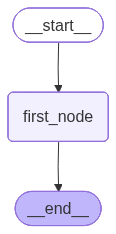

In [9]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [11]:
def chat(user_input: str):
    message = {"role": "user", "content": user_input}
    messages = [message]
    state = State(messages=messages)
    result = graph.invoke(state)
    print(result)
    return result["messages"][-1].content

gr.ChatInterface(chat, type="messages").launch()

/Users/soroushav/Desktop/projects/practice_agenticAI/.venv/lib/python3.12/site-packages/gradio/utils.py:1052: UserWarning: Expected 1 arguments for function <function chat at 0x11cf70860>, received 2.
  warnings.warn(
/Users/soroushav/Desktop/projects/practice_agenticAI/.venv/lib/python3.12/site-packages/gradio/utils.py:1060: UserWarning: Expected maximum 1 arguments for function <function chat at 0x11cf70860>, received 2.
  warnings.warn(
/Users/soroushav/Desktop/projects/practice_agenticAI/.venv/lib/python3.12/site-packages/gradio/utils.py:1052: UserWarning: Expected 1 arguments for function <function chat at 0x11cf71760>, received 2.
  warnings.warn(
/Users/soroushav/Desktop/projects/practice_agenticAI/.venv/lib/python3.12/site-packages/gradio/utils.py:1060: UserWarning: Expected maximum 1 arguments for function <function chat at 0x11cf71760>, received 2.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "/Users/soroushav/Desktop/projects/practice_agenticAI/.venv/lib/python3.12/site-packages/gradio/queueing.py", line 759, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/soroushav/Desktop/projects/practice_agenticAI/.venv/lib/python3.12/site-packages/gradio/route_utils.py", line 354, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/soroushav/Desktop/projects/practice_agenticAI/.venv/lib/python3.12/site-packages/gradio/blocks.py", line 2116, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/soroushav/Desktop/projects/practice_agenticAI/.venv/lib/python3.12/site-packages/gradio/blocks.py", line 1621, in call_function
    prediction = await fn(*processed_input)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sorou